In [1]:
import pandas as pd
import missingno as msno

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_18616/983643502.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  korean = pd.read_csv("Apart Deal.csv").iloc[:, 5:]


<Axes: >

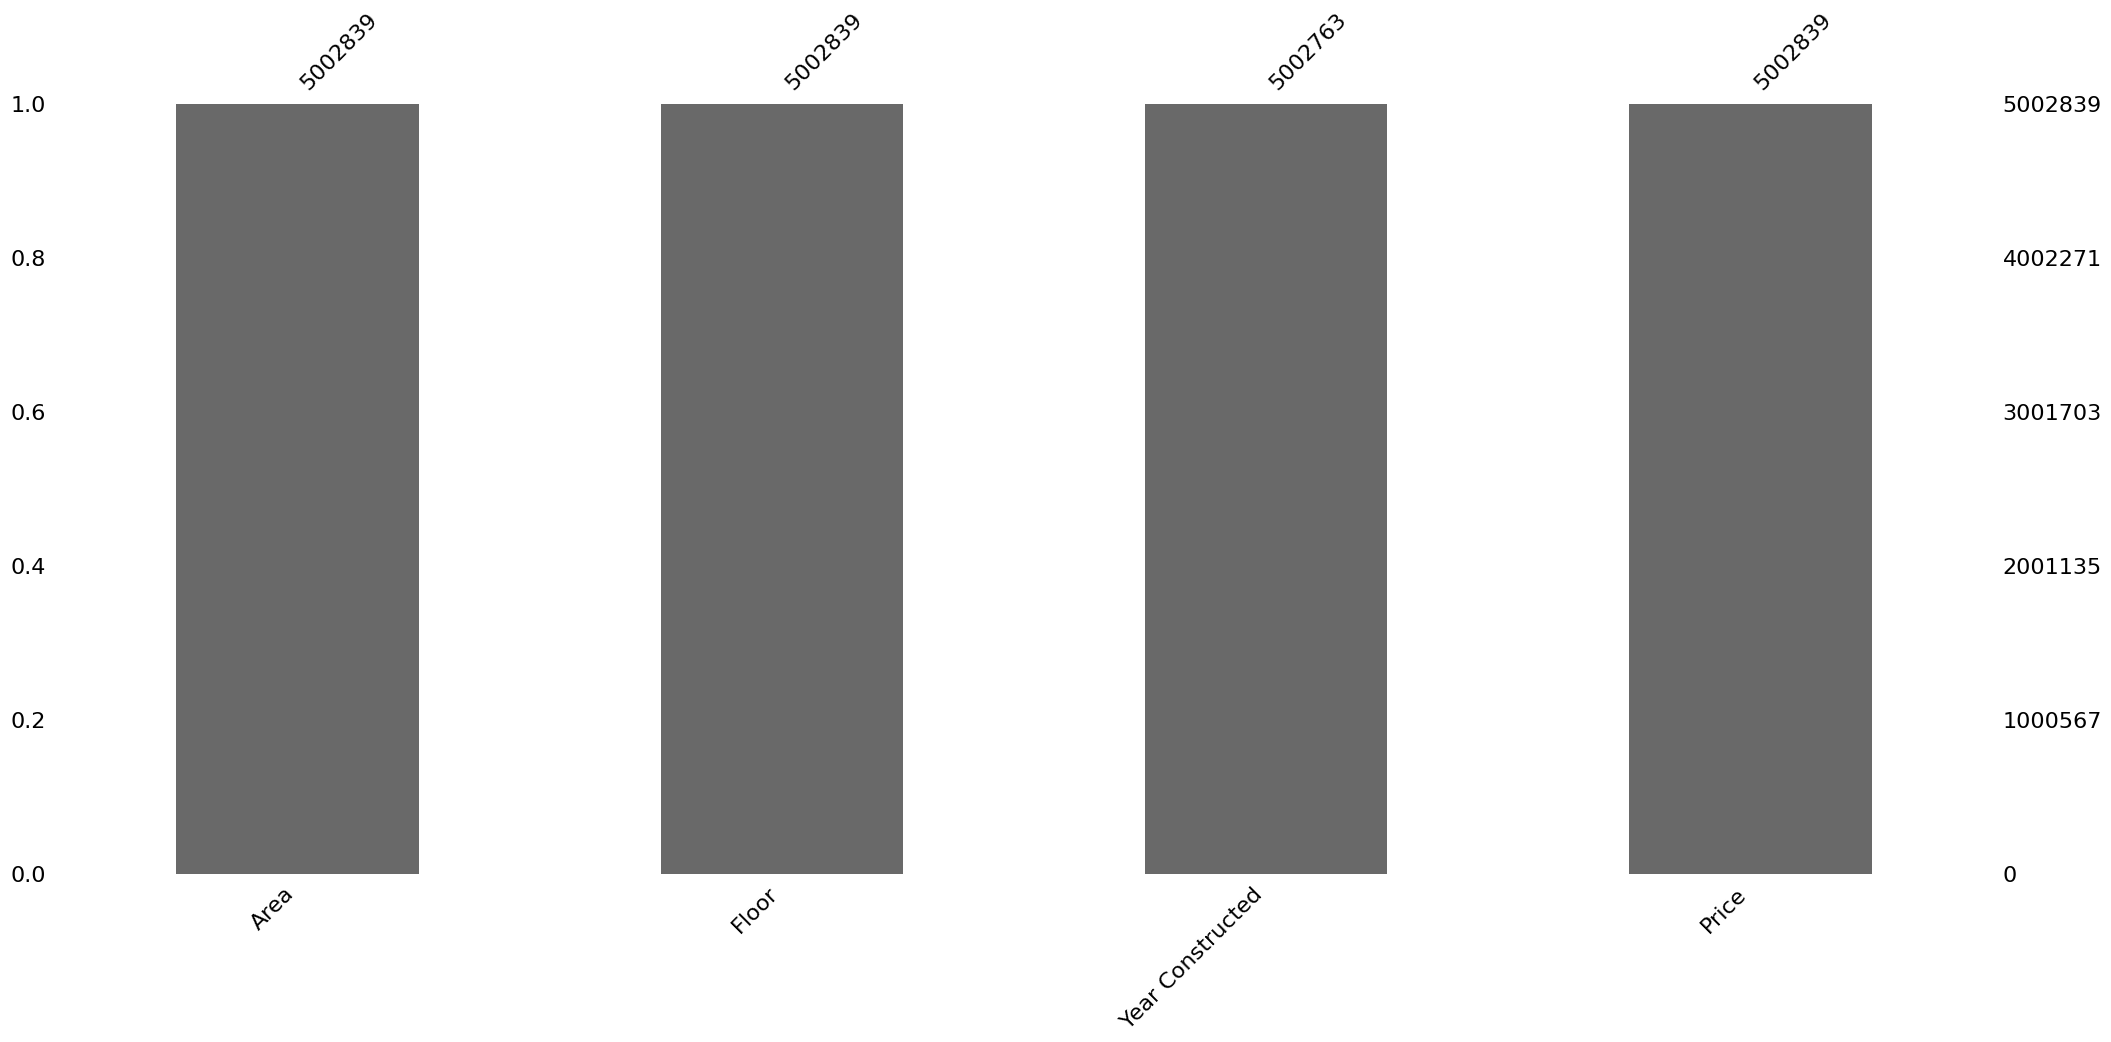

In [2]:
korean = pd.read_csv("Apart Deal.csv").iloc[:, 5:]
korean.columns = ["Area", "Floor", "Year Constructed", "Price"]
#korean["Room Count"] = 1
msno.bar(korean)
# ~100 missing from year constructed

In [3]:
korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Area              float64
 1   Floor             object 
 2   Year Constructed  float64
 3   Price             object 
dtypes: float64(2), object(2)
memory usage: 152.7+ MB


In [4]:
korean = korean.dropna()
korean["Price"] = korean["Price"].replace(regex = {',': ''}).astype(int)
korean["Year Constructed"] = korean["Year Constructed"].astype(int)
korean["Country"] = "South Korea"
korean

,Area,Floor,Year Constructed,Price,Country
0,135.5800,8,1991,26700,South Korea
1,101.6000,2,2006,35500,South Korea
2,84.9920,11,2007,36500,South Korea
3,118.7060,8,2006,43000,South Korea
4,84.9636,7,2007,38700,South Korea
...,...,...,...,...,...
5002834,57.1300,6,2019,19500,South Korea
5002835,49.8700,2,1999,21700,South Korea
5002836,45.3100,1,2000,9300,South Korea
5002837,51.8800,2,2003,25500,South Korea


In [5]:
korean.loc[korean["Area"] == min(korean.Area)]
korean.sort_values(by = "Price")

,Area,Floor,Year Constructed,Price,Country
2938997,138.250,-1,1974,100,South Korea
4037665,52.750,3,1987,350,South Korea
4037666,52.750,5,1987,350,South Korea
4037667,52.750,1,1987,350,South Korea
4037668,52.750,4,1987,350,South Korea
...,...,...,...,...,...
4349828,264.546,47,2020,1300000,South Korea
4349327,268.670,5,2020,1350000,South Korea
4686111,268.670,5.0,2020,1350000,South Korea
4364227,273.960,16,2020,1450000,South Korea


In [6]:
# floor as int

In [7]:
# Germany
germany = pd.read_csv("immo_data.csv")
#germany = germany[["regio1", "balcony", "totalRent", "yearConstructed", "baseRent", "livingSpace", "geo_krs", 
                   #"condition", "typeOfFlat", "noRooms", "floor", "numberOfFloors", "lastRefurbish", "date"]]
germany = germany[["livingSpace", "floor", "yearConstructed", "baseRent", "noRooms"]]
germany.columns = ["Area", "Floor", "Year Constructed", "Price", "Rooms"]
germany

,Area,Floor,Year Constructed,Price,Rooms
0,86.00,1.0,1965.0,595.0,4.0
1,89.00,NaN,1871.0,800.0,3.0
2,83.80,3.0,2019.0,965.0,3.0
3,58.15,3.0,1964.0,343.0,3.0
4,84.97,1.0,1950.0,765.0,3.0
...,...,...,...,...,...
268845,90.00,NaN,2016.0,820.0,3.0
268846,115.00,1.0,1983.0,930.0,3.5
268847,95.00,1.0,1965.0,650.0,4.0
268848,70.00,NaN,2019.0,840.0,2.0


<Axes: >

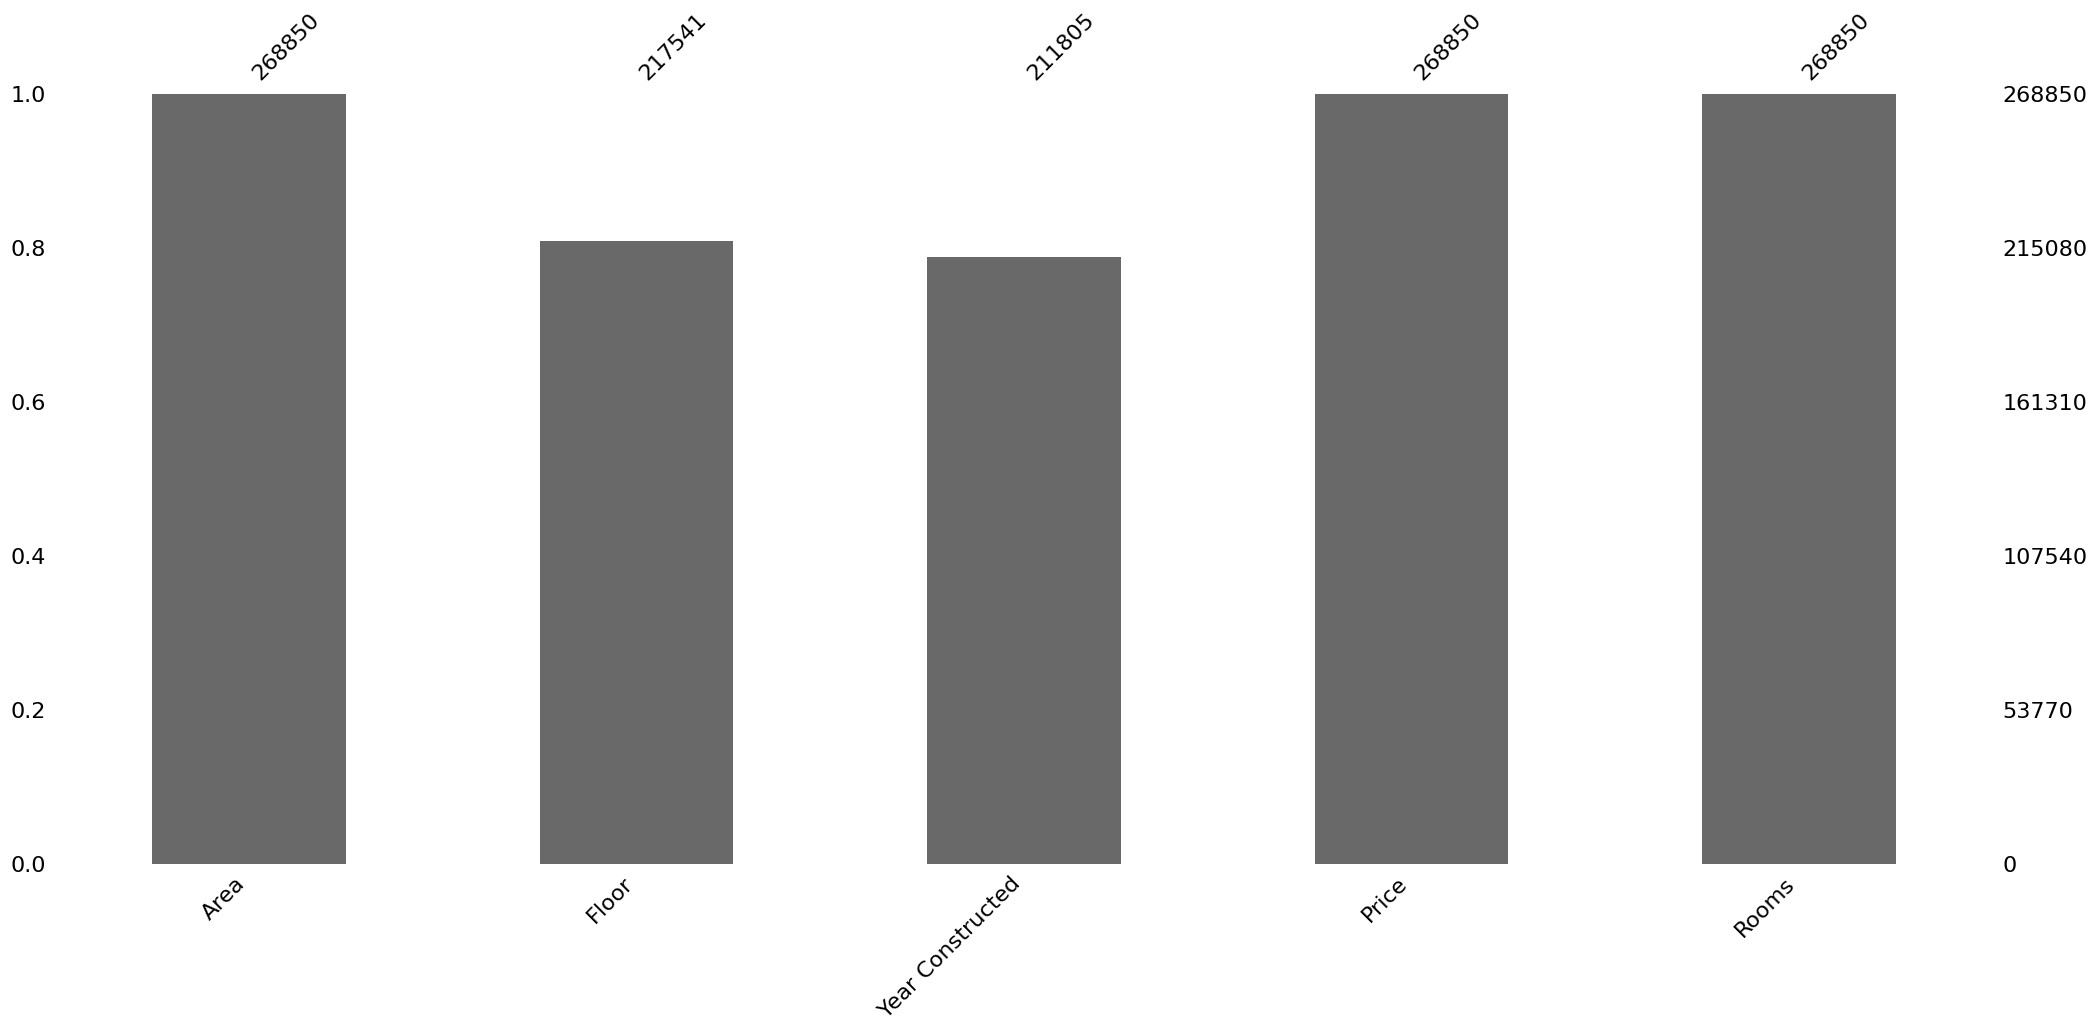

In [8]:
msno.bar(germany)

In [9]:
germany.dropna(inplace = True)
germany = germany.astype(int)
germany["Country"] = "Germany"
germany

,Area,Floor,Year Constructed,Price,Rooms,Country
0,86,1,1965,595,4,Germany
2,83,3,2019,965,3,Germany
3,58,3,1964,343,3,Germany
4,84,1,1950,765,3,Germany
8,53,2,1970,580,2,Germany
...,...,...,...,...,...,...
268840,89,2,2016,1255,3,Germany
268841,57,2,1994,302,2,Germany
268843,55,1,1930,248,2,Germany
268846,115,1,1983,930,3,Germany


In [10]:
# Poland
poland = pd.read_csv("apartments_rent_pl_2023_11.csv")
#poland["buildingMaterial"].value_counts(dropna=False)
#poland = poland[["squareMeters", "rooms", "floor", "floorCount", "buildYear", "poiCount", "condition", "price"]]
#type**
poland = poland[["squareMeters", "floor", "buildYear", "price", "rooms"]]
poland.columns = ["Area", "Floor", "Year Constructed", "Price", "Rooms"]
poland

,Area,Floor,Year Constructed,Price,Rooms
0,52.0,3.0,2008.0,3500,2.0
1,57.0,NaN,1976.0,3000,3.0
2,43.4,3.0,NaN,1900,2.0
3,32.6,5.0,2021.0,2500,2.0
4,72.0,6.0,2014.0,2999,3.0
...,...,...,...,...,...
8528,48.0,3.0,2019.0,2700,2.0
8529,50.0,1.0,2019.0,2800,2.0
8530,40.0,1.0,NaN,1500,2.0
8531,60.0,3.0,NaN,3200,3.0


<Axes: >

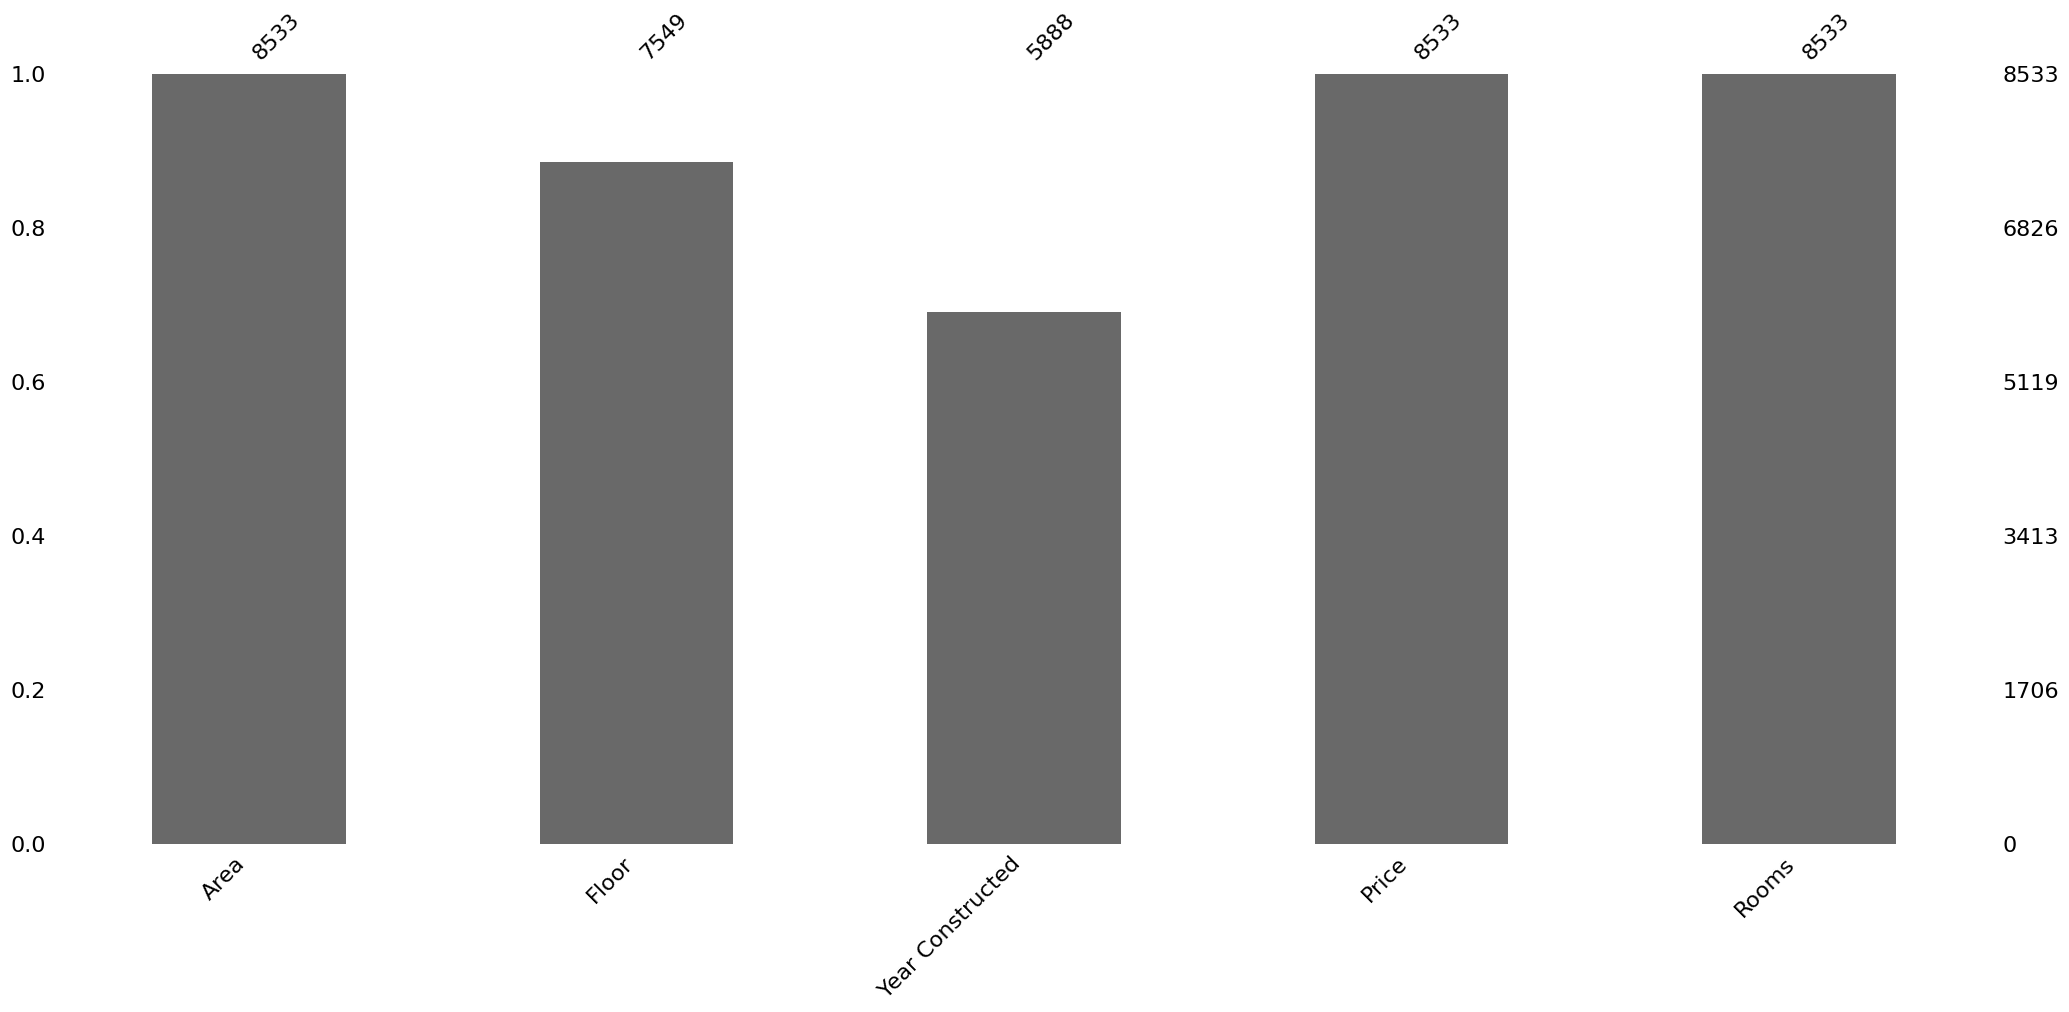

In [11]:
msno.bar(poland)

In [12]:
poland.dropna(inplace = True)
poland = poland.astype(int)
poland["Country"] = "Poland"
poland

,Area,Floor,Year Constructed,Price,Rooms,Country
0,52,3,2008,3500,2,Poland
3,32,5,2021,2500,2,Poland
4,72,6,2014,2999,3,Poland
5,52,1,2006,2300,2,Poland
6,45,4,1978,2500,2,Poland
...,...,...,...,...,...,...
8516,28,3,1980,1300,1,Poland
8526,25,4,1991,1400,1,Poland
8528,48,3,2019,2700,2,Poland
8529,50,1,2019,2800,2,Poland


In [13]:
# Spain
spain = pd.read_csv("pisos.csv")
spain

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_18616/2001942116.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  spain = pd.read_csv("pisos.csv")


,Unnamed: 0,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
0,0,Casa en calle Urb. Las Mimosas,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/104/1069_I00...,Recomendado,250.000 €,315 m²,4,793 €/m²,3,31,pisos,a_coruna
1,1,Piso en Milladoiro,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/113/1069_I00...,Recomendado,90.000 €,72 m²,2,1.250 €/m²,1,11,pisos,a_coruna
2,2,Casa en calle La Piedra,NaN,A Ortigueira (Cariño),https://fotos1.imghs.net/nrd//999170/892070610...,Recomendado,50.000 €,92 m²,2,543 €/m²,1,40,pisos,a_coruna
3,3,Casa en Perillo,NaN,Perillo (Oleiros),https://fotos3.imghs.net/nrd/1089/198/1089_XA2...,Recomendado,359.000 €,244 m²,4,1.471 €/m²,3,39,pisos,a_coruna
4,4,Chalet en Urbanización Las Mimosas,NaN,O Milladoiro (Ames),https://fotos5.imghs.net/nrd/1097/754/1097_0_f...,Recomendado,200.430 €,315 m²,4,636 €/m²,3,24,pisos,a_coruna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777174,831430,Finca rústica en Cardedeu,Suelo urbano no consolidado de uso residencial...,Cardedeu,https://fotos4.imghs.net/nrd/1088/335/1088_727...,NaN,A consultar,4.381 m²,NaN,NaN,NaN,10,fincas_rusticas,valles_oriental_sud
777175,831431,Finca rústica en Granollers,Solar urbano consolidado sin edificación de us...,Can Bassa-Palou (Granollers),https://fotos2.imghs.net/nrd/1088/137/1088_727...,NaN,A consultar,4.063 m²,NaN,NaN,NaN,4,fincas_rusticas,valles_oriental_sud
777176,831432,Finca rústica en La Roca del Vallès,+finca situada al norte del municipio de la ro...,La Roca del Vallès,https://fotos3.imghs.net/nrd//1005/057/1005_60...,NaN,1.350.000 €,350 m²,5,3.857 €/m²,2.0,9,fincas_rusticas,valles_oriental_sud
777177,831433,"Finca rústica en Bajada Les Valls, nº S/N","""Masía típica catalana, casa principal de 165 ...",La Roca del Vallès,https://fotos5.imghs.net/nrd/1098/460/1098_0_f...,NaN,456.000 €,202 m²,5,2.257 €/m²,3.0,30,fincas_rusticas,valles_oriental_sud


In [14]:
spain = spain[["size", "price", "rooms"]]
spain.columns = ["Area", "Price", "Rooms"]
spain

,Area,Price,Rooms
0,315 m²,250.000 €,4
1,72 m²,90.000 €,2
2,92 m²,50.000 €,2
3,244 m²,359.000 €,4
4,315 m²,200.430 €,4
...,...,...,...
777174,4.381 m²,A consultar,NaN
777175,4.063 m²,A consultar,NaN
777176,350 m²,1.350.000 €,5
777177,202 m²,456.000 €,5


In [20]:
# Argentina
argentina = pd.read_csv("ar_properties.csv")
argentina = argentina[["property_type", "operation_type", "price_period", "surface_covered", "rooms", "price", "currency"]]
argentina

,property_type,operation_type,price_period,surface_covered,rooms,price,currency
0,Lote,Venta,Mensual,NaN,NaN,NaN,NaN
1,Departamento,Venta,Mensual,41.0,NaN,NaN,NaN
2,Departamento,Alquiler temporal,Mensual,45.0,2.0,NaN,NaN
3,Departamento,Alquiler temporal,Mensual,48.0,2.0,NaN,NaN
4,Departamento,Alquiler temporal,Mensual,45.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
999995,Otro,Venta,NaN,NaN,NaN,750000.0,USD
999996,Otro,Venta,NaN,NaN,NaN,180000.0,USD
999997,Otro,Venta,NaN,NaN,NaN,450000.0,USD
999998,Otro,Venta,NaN,NaN,NaN,500000.0,USD


<Axes: >

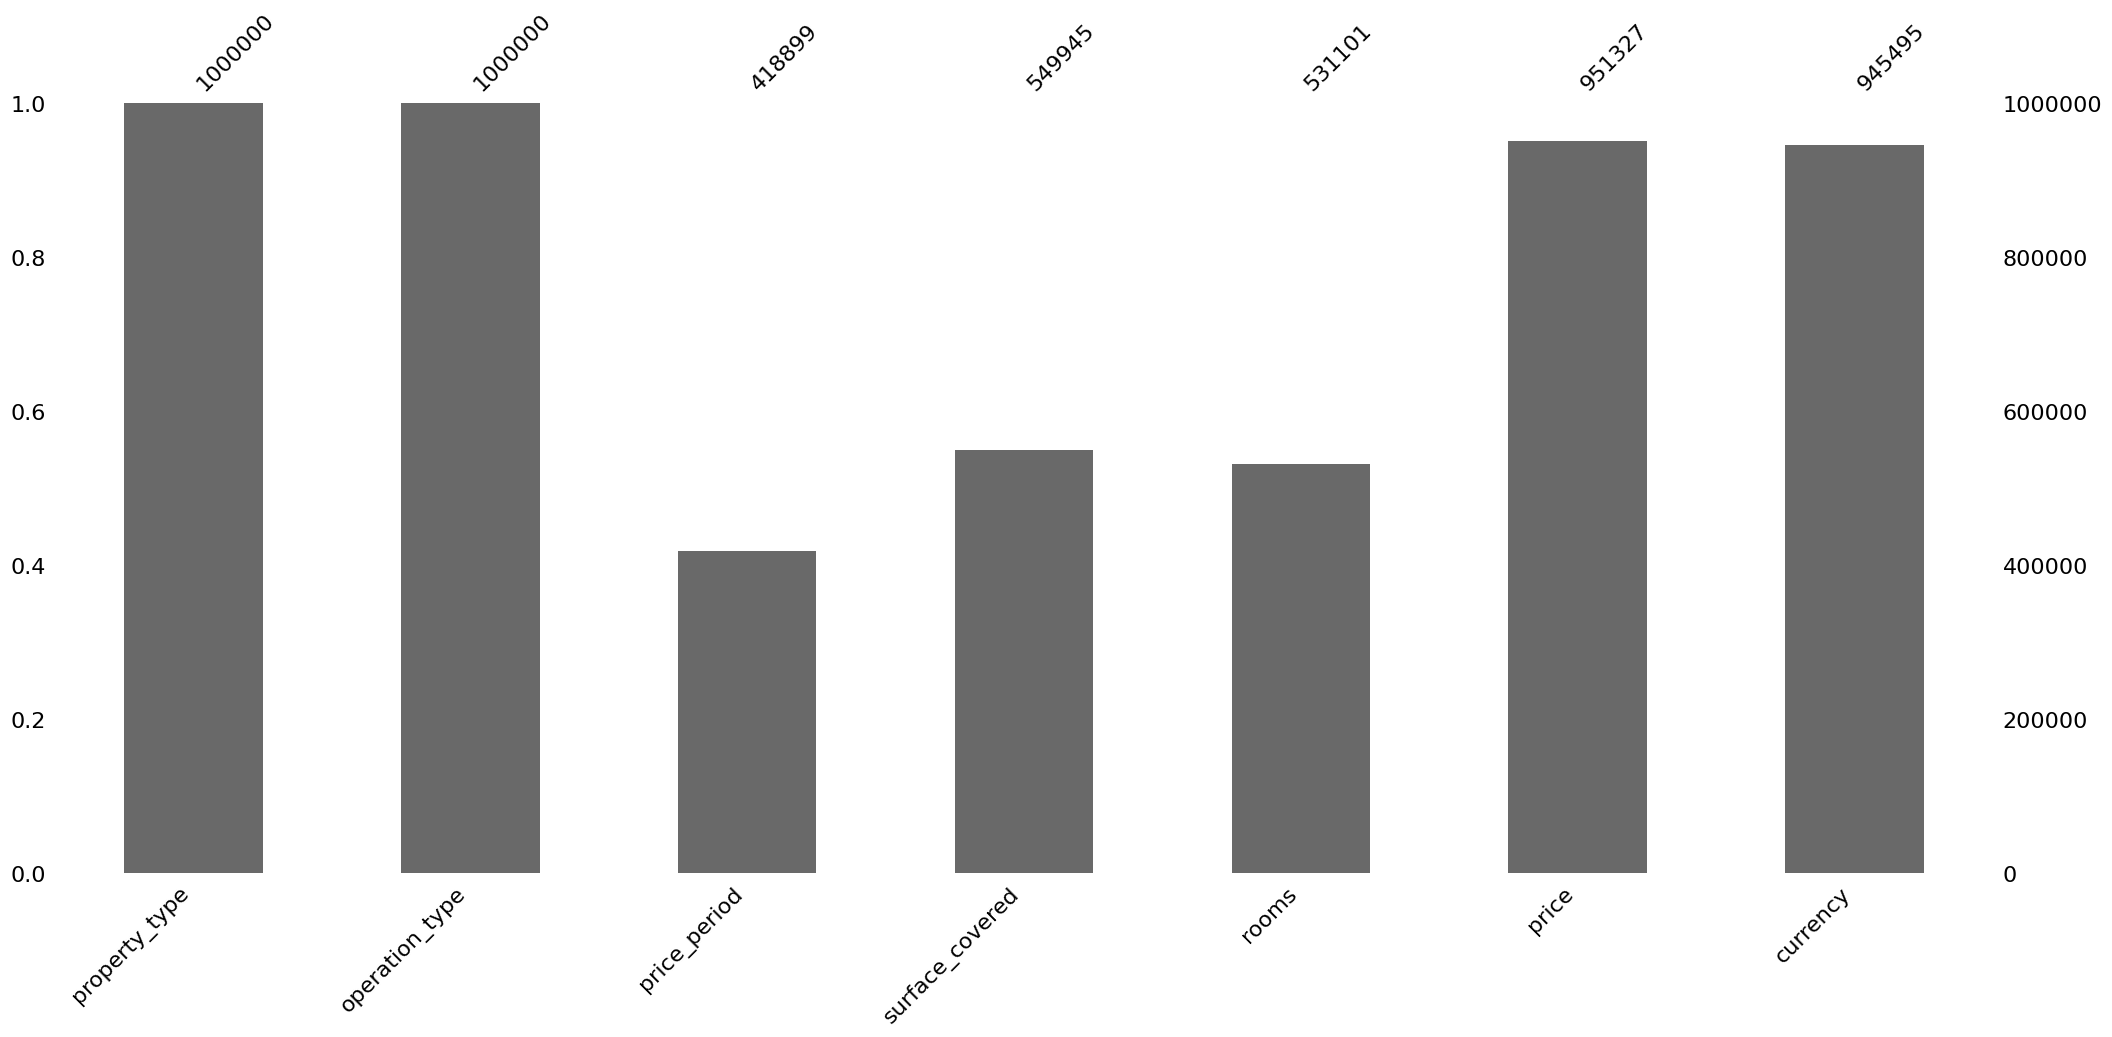

In [21]:
msno.bar(argentina)

In [ ]:
#filter by type (then check missing barplot again)